In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import norm

#Abimael Bautista Oliveros
#20120084

df = pd.read_csv('Retrasos.csv')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   int64  
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

None

In [65]:
tipos_de_datos = df.dtypes
num_numericas = tipos_de_datos[tipos_de_datos != 'object'].count()
num_objeto = tipos_de_datos[tipos_de_datos == 'object'].count()

In [66]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()

print("\nColumnas Numéricas:")
print(columnas_numericas)
print("\nColumnas de Tipo Objeto:")
print(columnas_objeto)
print("--------------------------")
print(f"Columnas numéricas: {num_numericas}")
print(f"Columnas de tipo objeto: {num_objeto}")


Columnas Numéricas:
['id', 'late_delivery', 'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price', 'unit_cost', 'weight_kilograms', 'freight_cost_usd', 'line_item_insurance_usd']

Columnas de Tipo Objeto:
['country', 'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode', 'late', 'product_group', 'sub_classification', 'vendor', 'item_description', 'molecule_test_type', 'brand', 'dosage', 'dosage_form', 'manufacturing_site', 'first_line_designation', 'freight_cost_groups']
--------------------------
Columnas numéricas: 11
Columnas de tipo objeto: 17


In [67]:
# Conteo de datos nulos y ordenar de forma descendente
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Conteo de datos nulos, ordenados de forma descendente:")
print(null_counts)

Conteo de datos nulos, ordenados de forma descendente:
unit_cost                   983
dosage                      409
line_item_insurance_usd      34
freight_cost_groups          14
freight_cost_usd             14
fulfill_via                   0
unit_of_measure_per_pack      0
weight_kilograms              0
first_line_designation        0
manufacturing_site            0
managed_by                    0
unit_price                    0
pack_price                    0
line_item_value               0
line_item_quantity            0
dosage_form                   0
vendor_inco_term              0
country                       0
brand                         0
molecule_test_type            0
item_description              0
vendor                        0
sub_classification            0
product_group                 0
late                          0
late_delivery                 0
shipment_mode                 0
id                            0
dtype: int64


In [68]:
# Datos estadísticos de las variables numéricas
numeric_stats = df.describe()
print("Datos estadísticos de las variables numéricas:")
print(numeric_stats)

Datos estadísticos de las variables numéricas:
                 id  late_delivery  unit_of_measure_per_pack  \
count   1000.000000     1000.00000               1000.000000   
mean   39239.957000        0.06100                 78.675000   
std    24878.296938        0.23945                 91.124569   
min        1.000000        0.00000                  1.000000   
25%    17055.000000        0.00000                 30.000000   
50%    38283.500000        0.00000                 60.000000   
75%    62036.500000        0.00000                100.000000   
max    82105.000000        1.00000               1000.000000   

       line_item_quantity  line_item_value   pack_price   unit_price  \
count         1000.000000     1.000000e+03  1000.000000  1000.000000   
mean         15923.379000     1.542272e+05    36.570830     1.094050   
std          37793.936877     2.160517e+05    47.611183     3.356263   
min              1.000000     0.000000e+00     0.000000     0.000000   
25%            6

In [69]:
paises_unicos = df['country'].drop_duplicates()
print(paises_unicos)

0                 Nigeria
1                Botswana
2                 Vietnam
3            South Africa
4                  Uganda
5                Ethiopia
6                   Sudan
7           Cote d'Ivoire
8                  Malawi
10                 Zambia
14             Mozambique
19               Tanzania
21                  Ghana
27                Namibia
33                 Rwanda
              ...        
35                  Haiti
55            South Sudan
59                  Kenya
85                 Guyana
93                Senegal
96               Zimbabwe
115             Guatemala
129               Burundi
158            Congo, DRC
160                Angola
257    Dominican Republic
265               Liberia
375              Pakistan
463             Swaziland
643                  Mali
Name: country, Length: 31, dtype: object


In [70]:
country_to_continent = {
    'Nigeria': 'África',
    'Botswana': 'África',
    'Vietnam': 'Asia',
    'South Africa': 'África',
    'Uganda': 'África',
    'Ethiopia': 'África',
    'Sudan': 'África',
    "Cote d'Ivoire": 'África',
    'Malawi': 'África',
    'Zambia': 'África',
    'Mozambique': 'África',
    'Tanzania': 'África',
    'Ghana': 'África',
    'Namibia': 'África',
    'Rwanda': 'África',
    'Cameroon': 'África',
    'Haiti': 'América',
    'South Sudan': 'África',
    'Kenya': 'África',
    'Guyana': 'América',
    'Senegal': 'África',
    'Zimbabwe': 'África',
    'Guatemala': 'América',
    'Burundi': 'África',
    'Congo, DRC': 'África',
    'Angola': 'África',
    'Dominican Republic': 'América',
    'Liberia': 'África',
    'Pakistan': 'Asia',
    'Swaziland': 'África',
    'Mali': 'África'
}

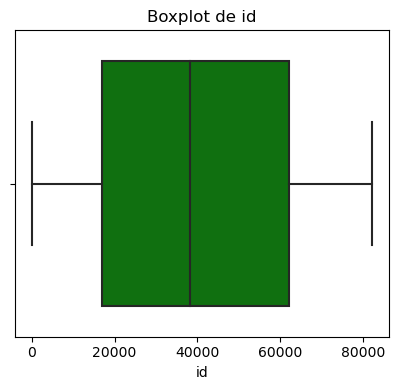

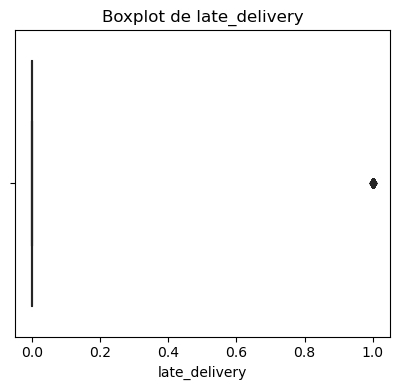

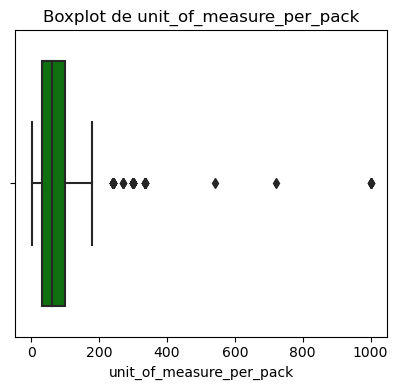

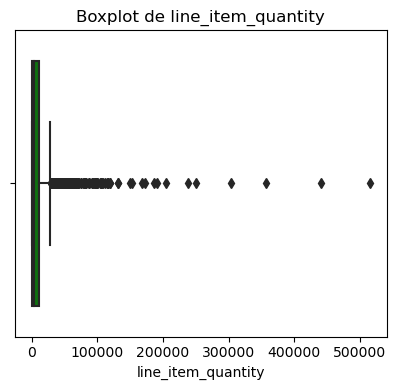

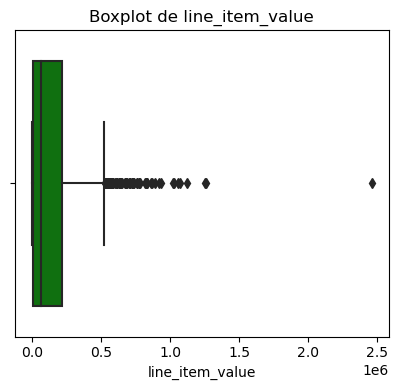

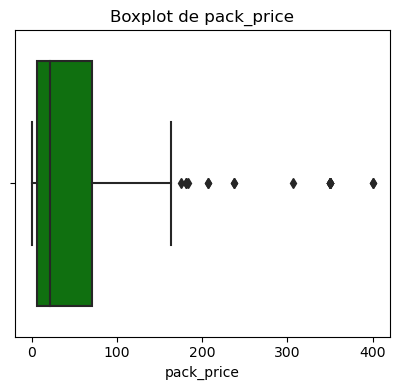

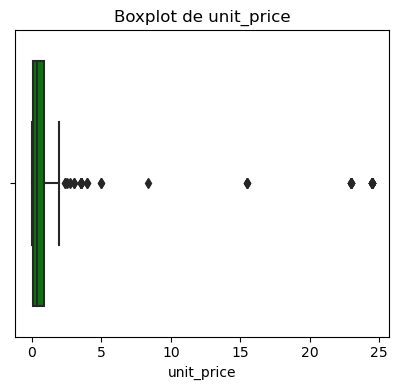

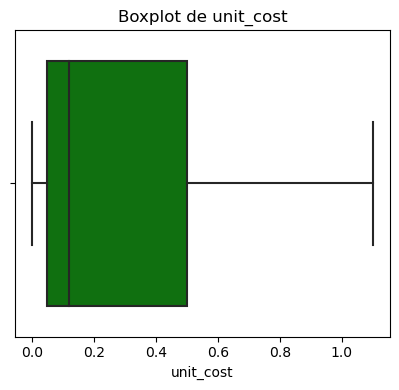

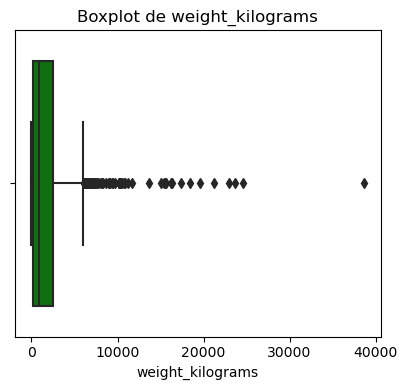

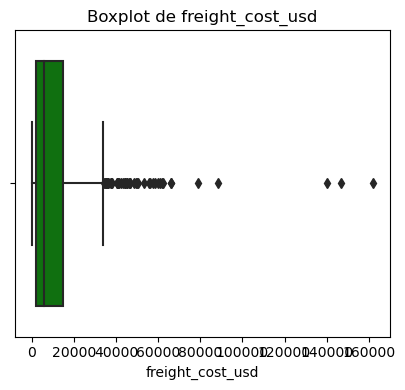

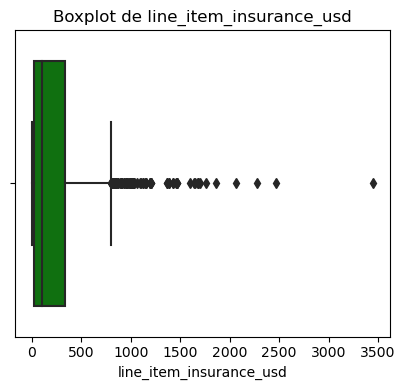

In [71]:
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns

for columna in columnas_numericas:
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[columna], color='green')
    plt.title(f'Boxplot de {columna}')
    plt.tight_layout()
    plt.show()

In [ ]:
#Despues de observar los graficos de las columnas numericas, varias presentan datos atipicos.

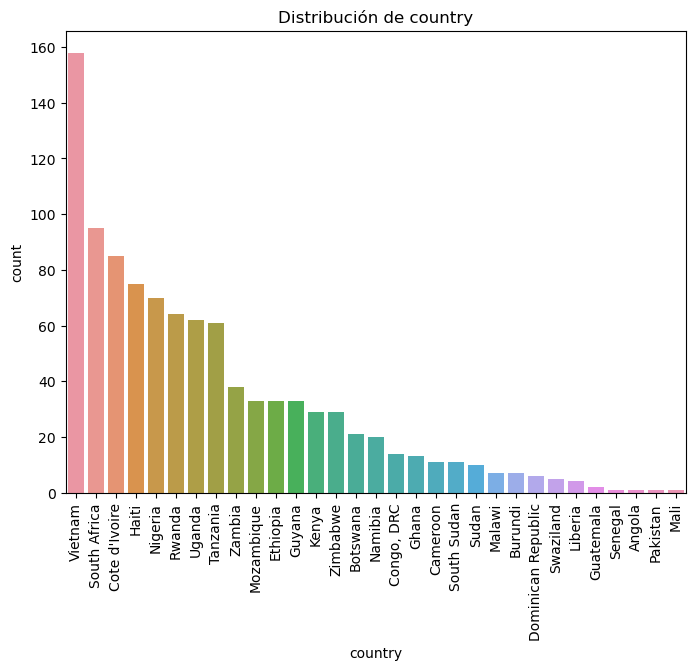

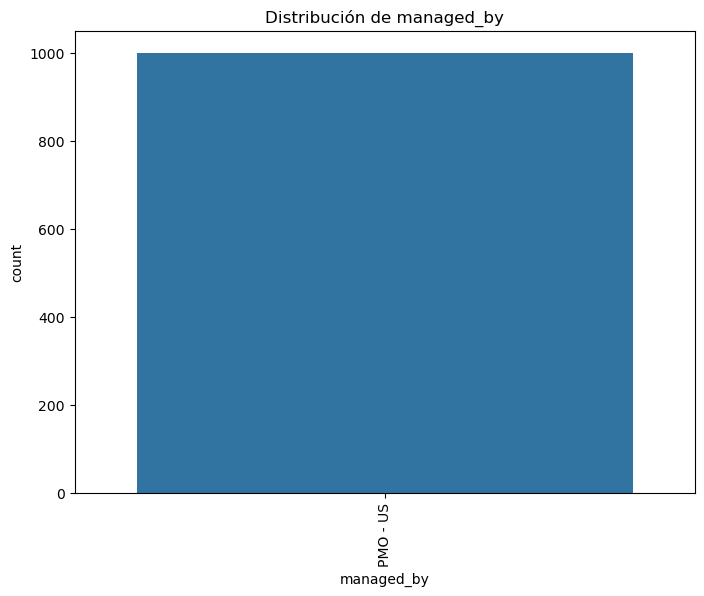

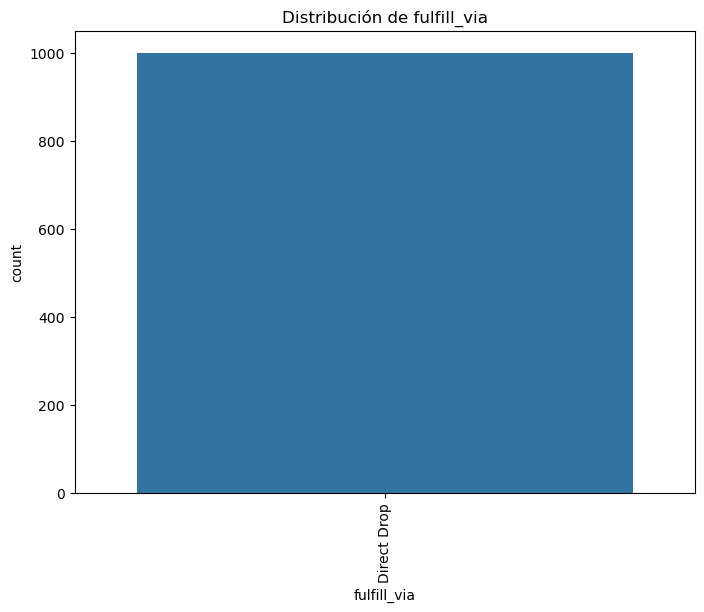

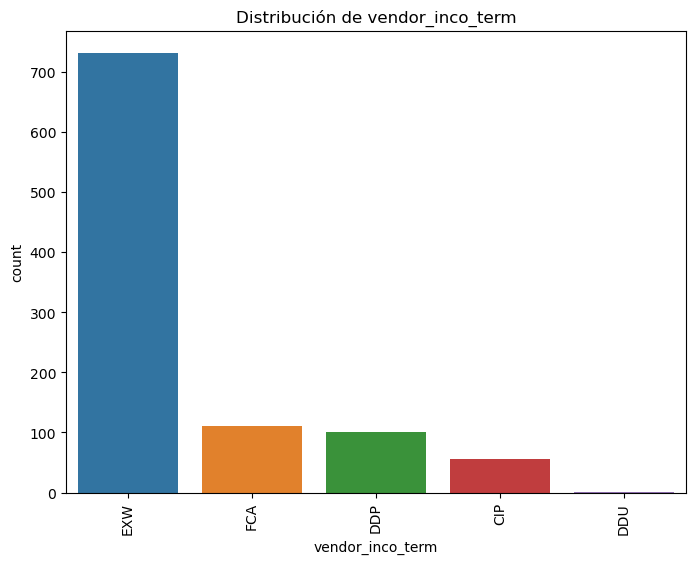

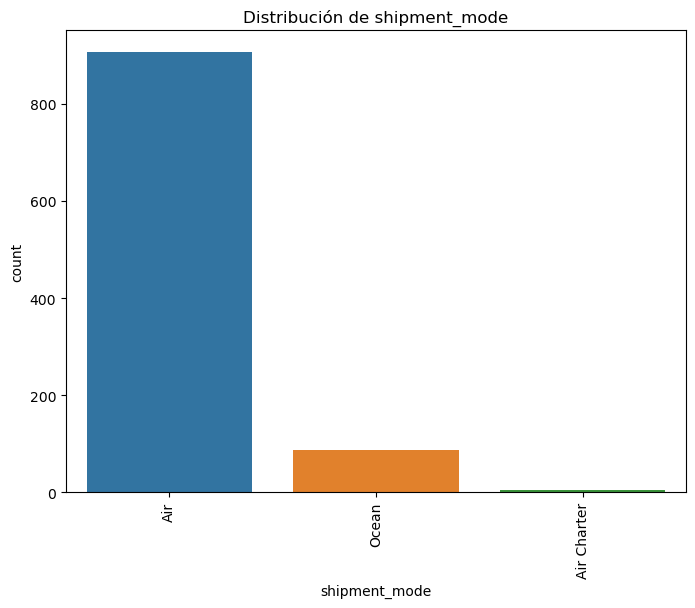

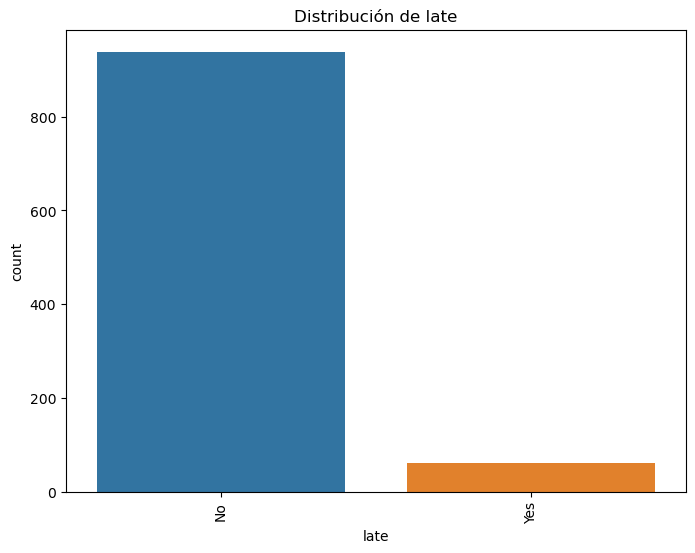

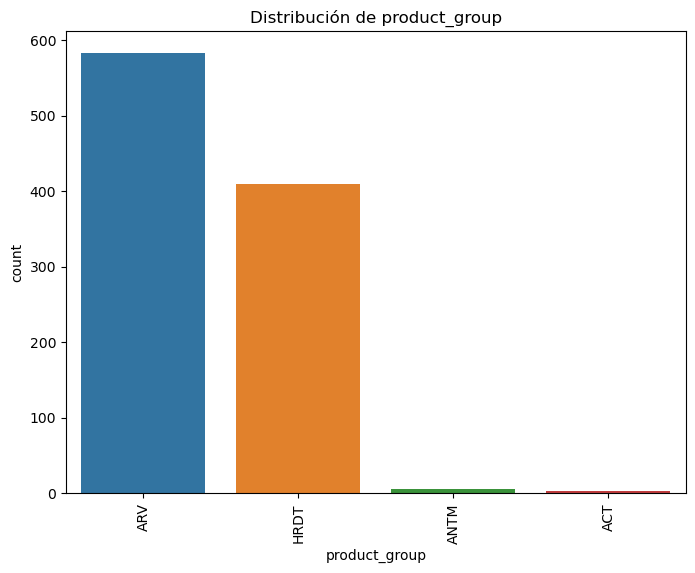

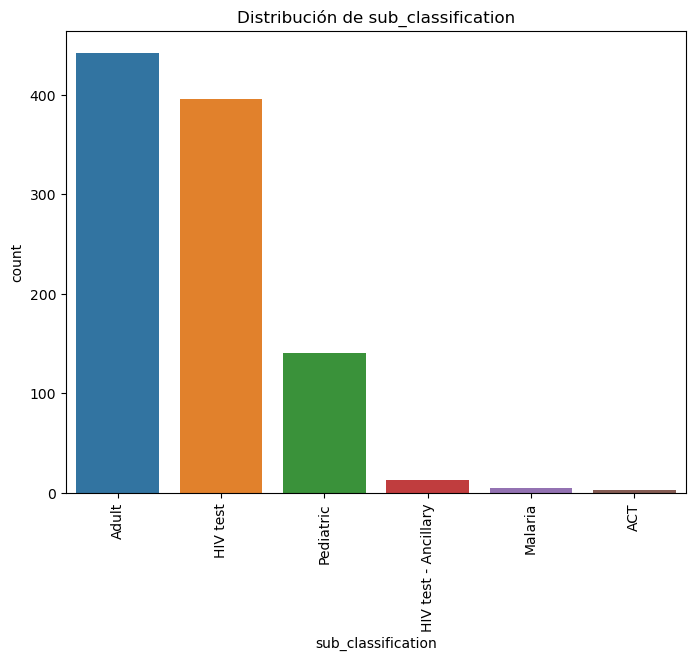

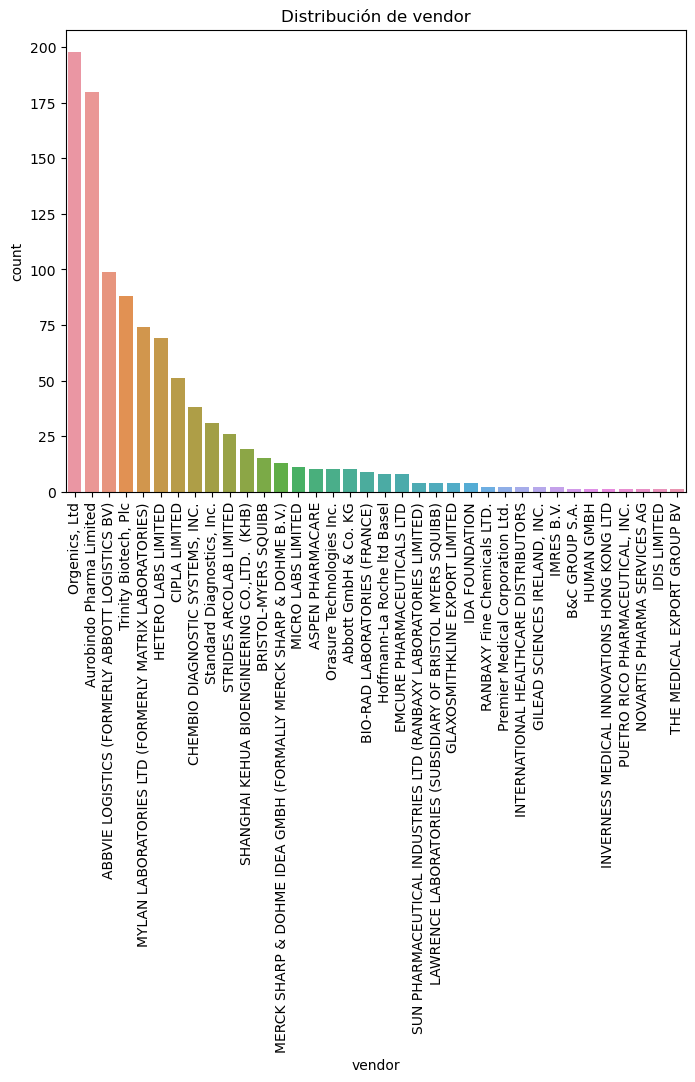

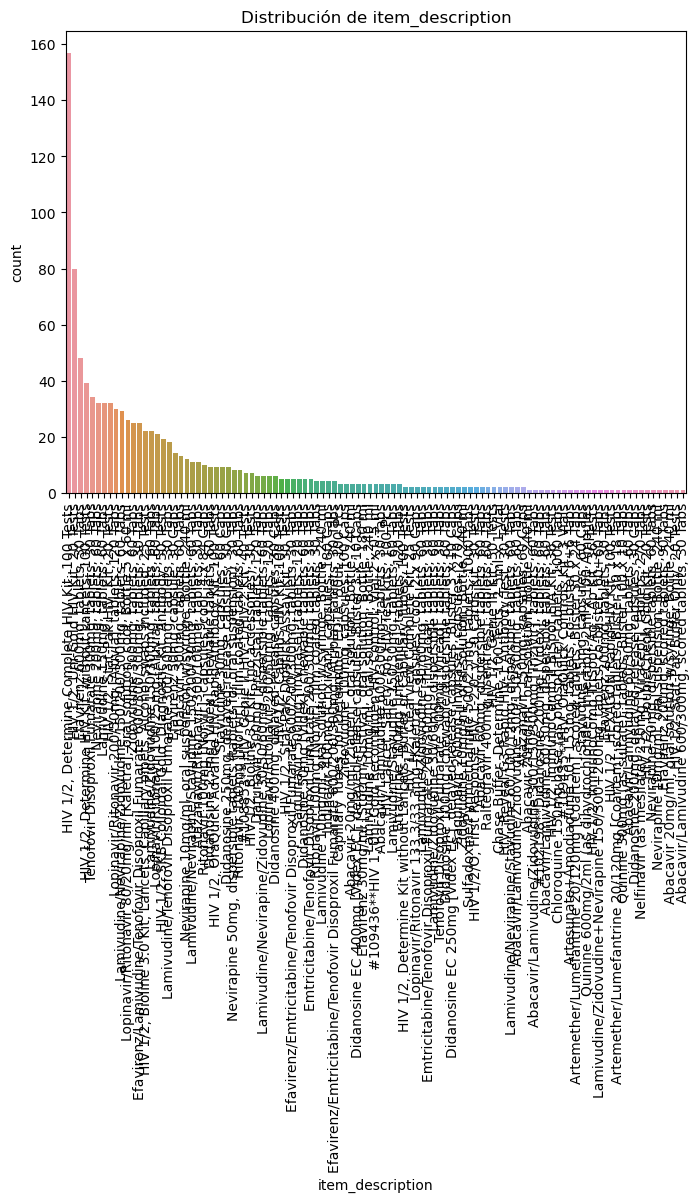

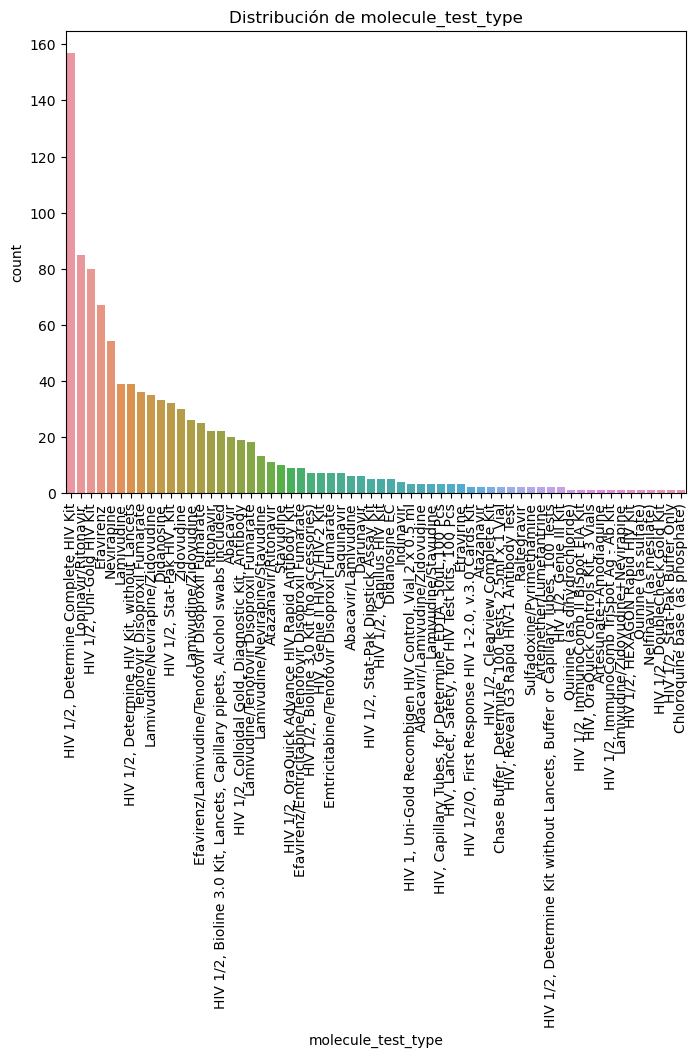

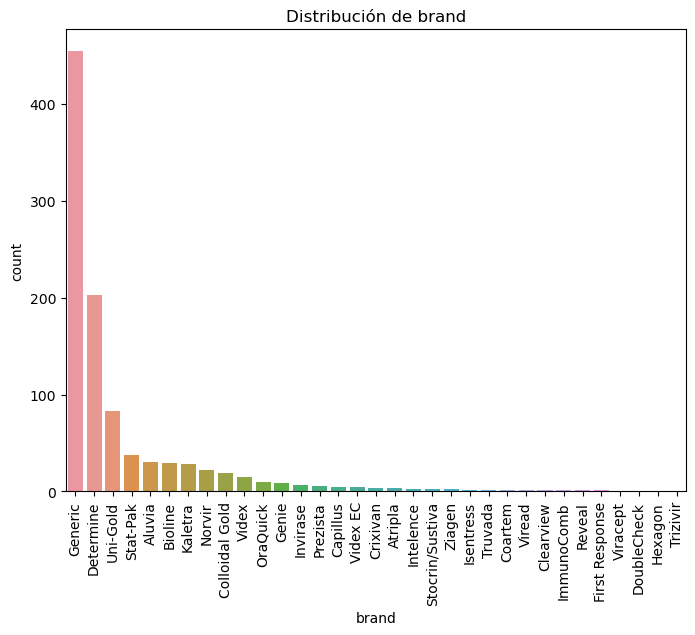

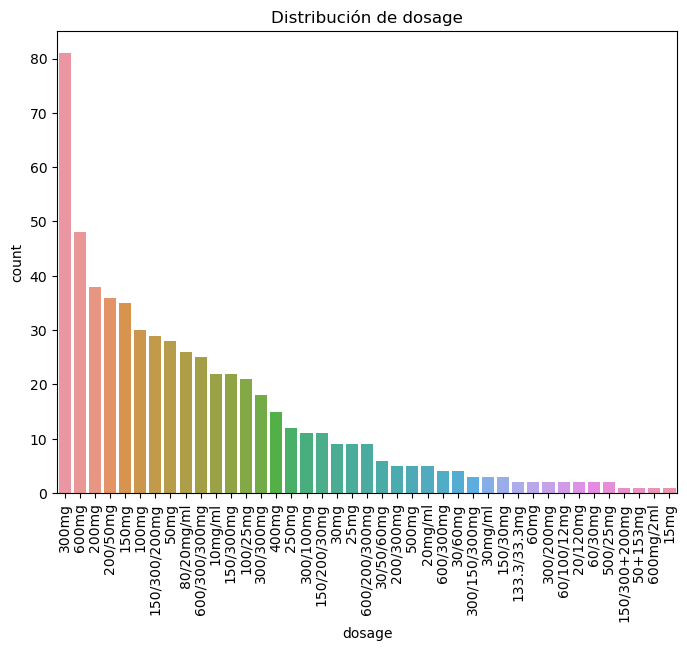

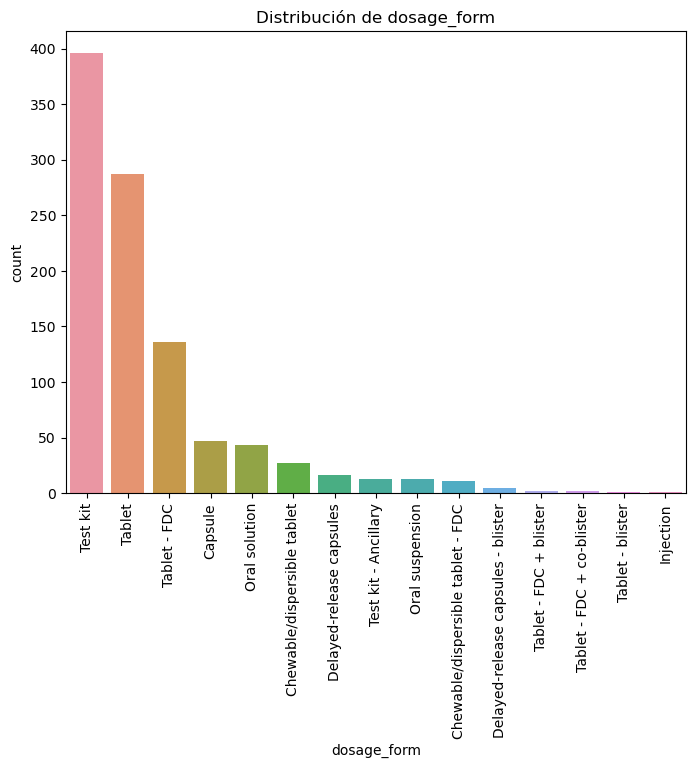

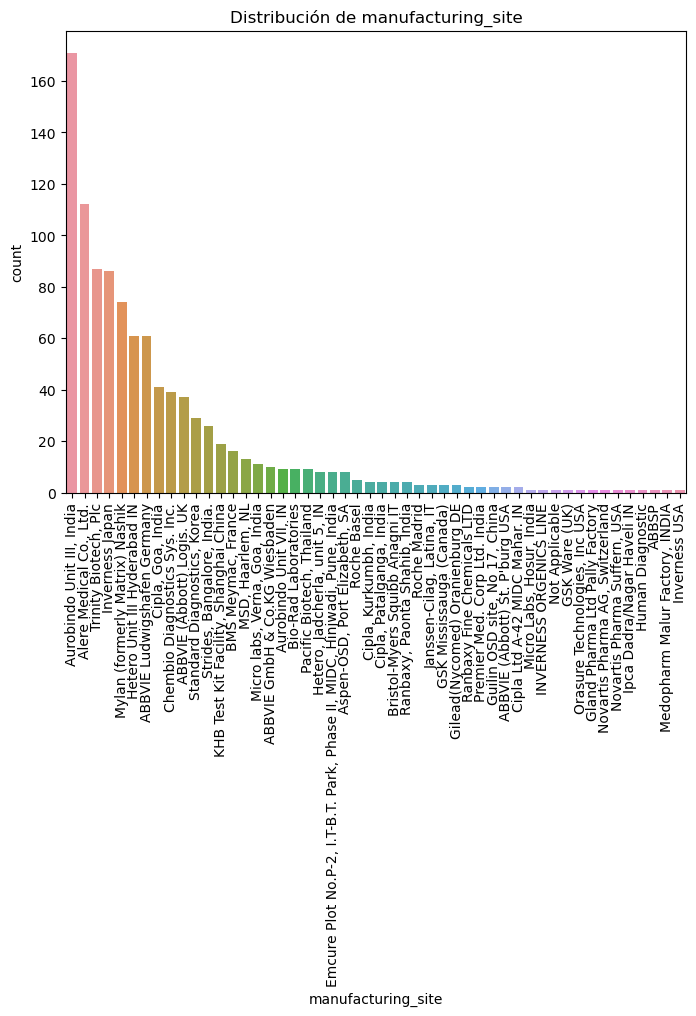

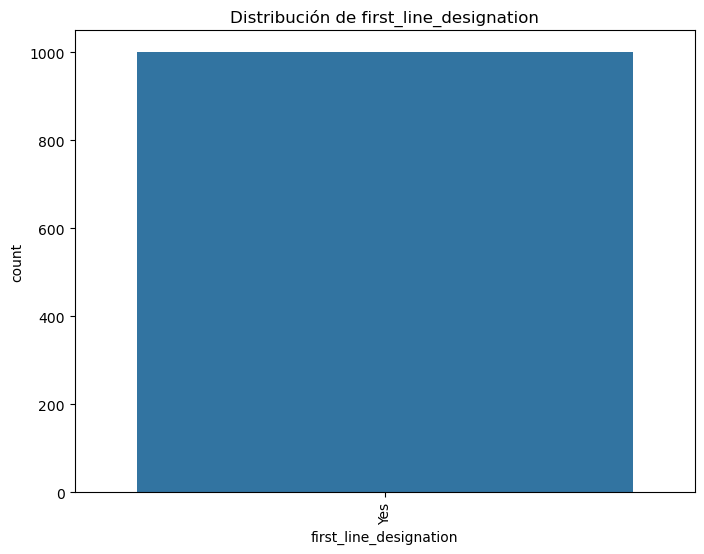

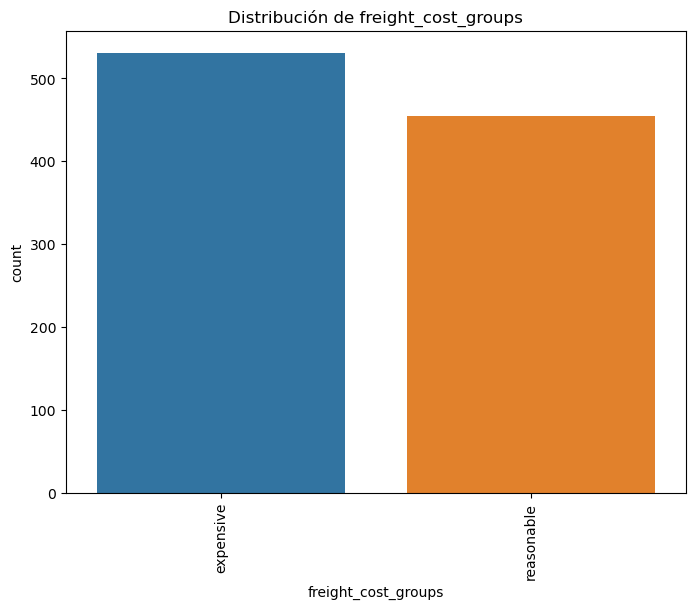

In [72]:
columnas_objeto = df.select_dtypes(include=['object']).columns
for columna in columnas_objeto:
    plt.figure(figsize=(8, 6))
    
    sns.countplot(x=columna, data=df, order=df[columna].value_counts().index)
    plt.title(f'Distribución de {columna}')
    plt.xticks(rotation=90)  

    plt.show()

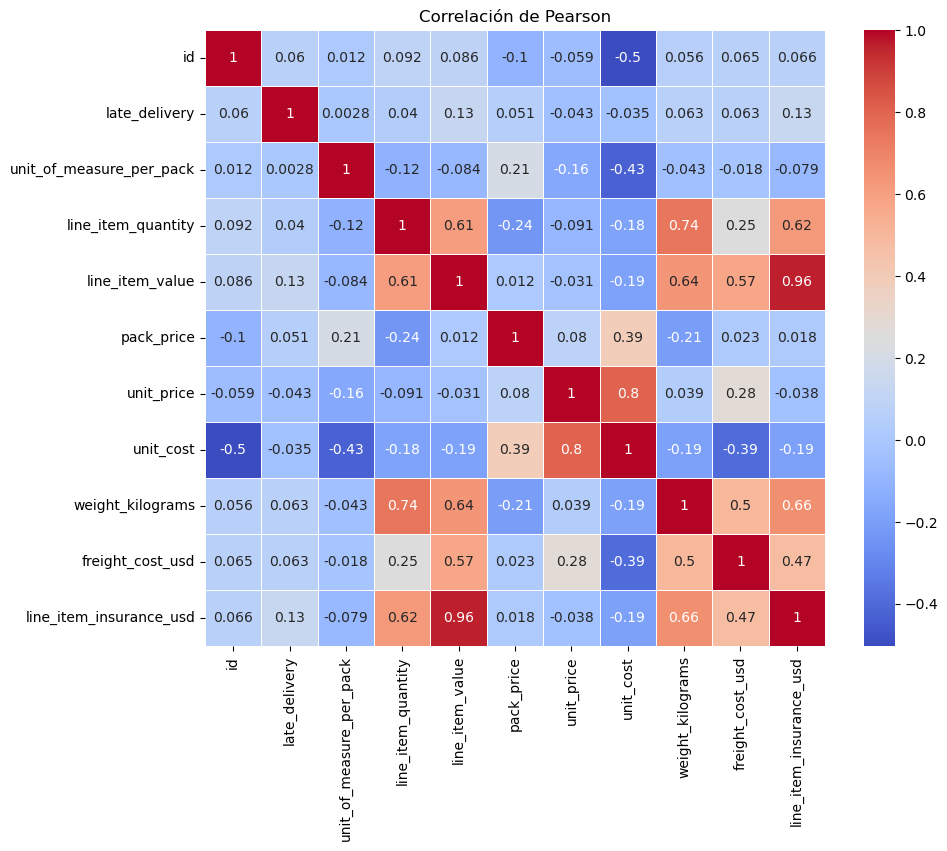

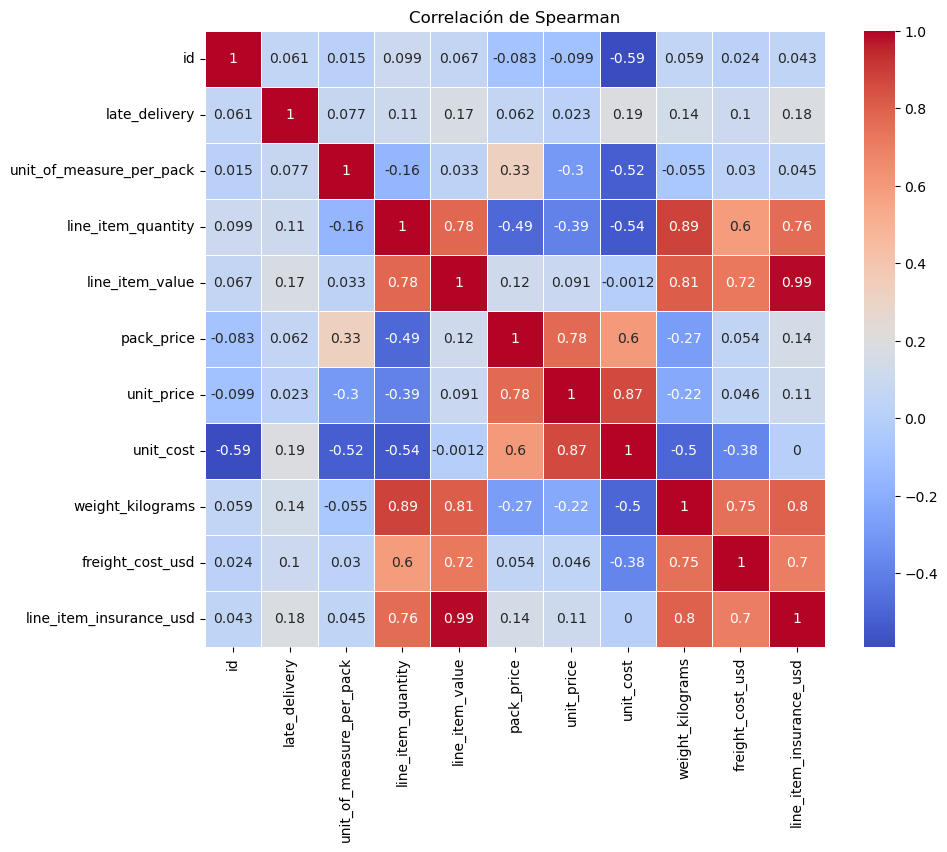

In [200]:
df_numeric = df.select_dtypes(include=[np.number])

correlation_pearson = df_numeric.corr(method='pearson')
correlation_spearman = df_numeric.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación de Pearson")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación de Spearman")
plt.show()


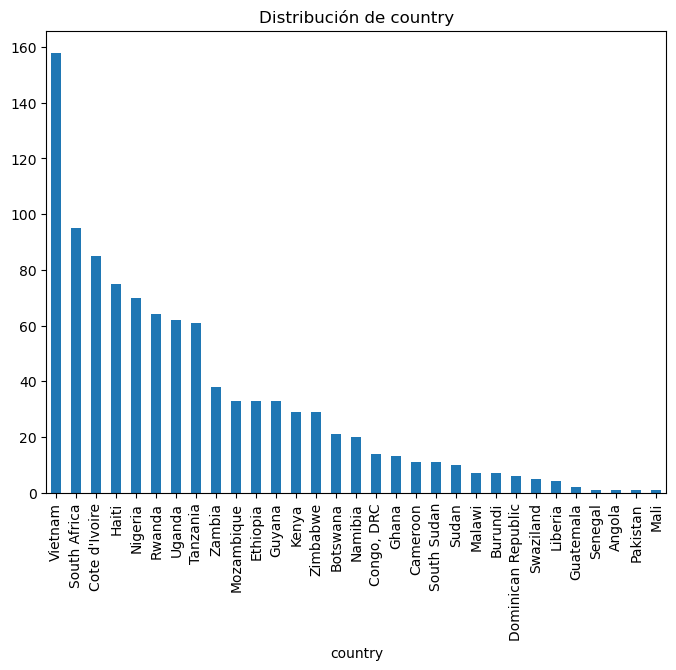

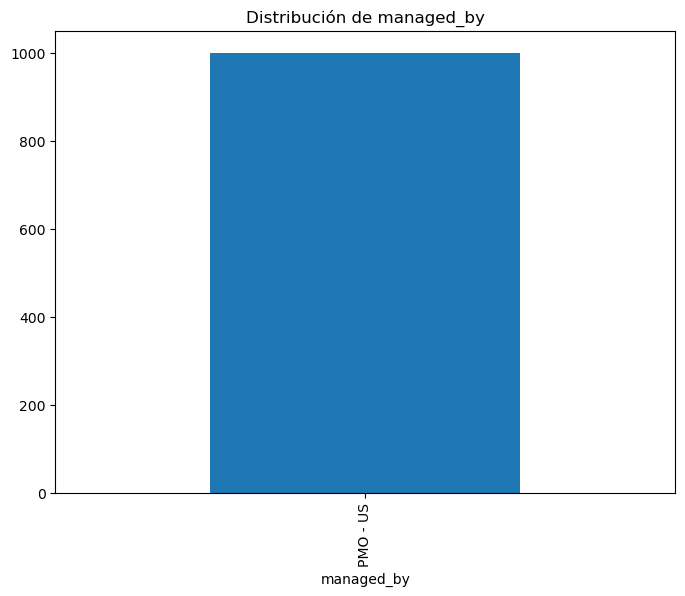

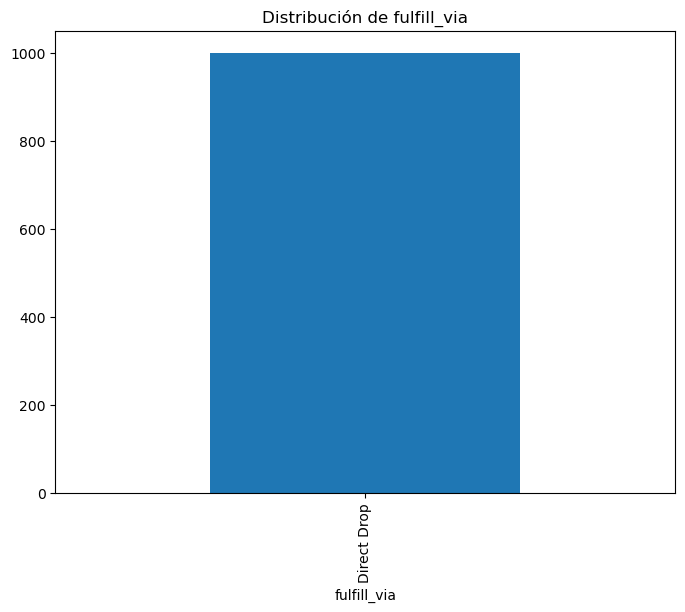

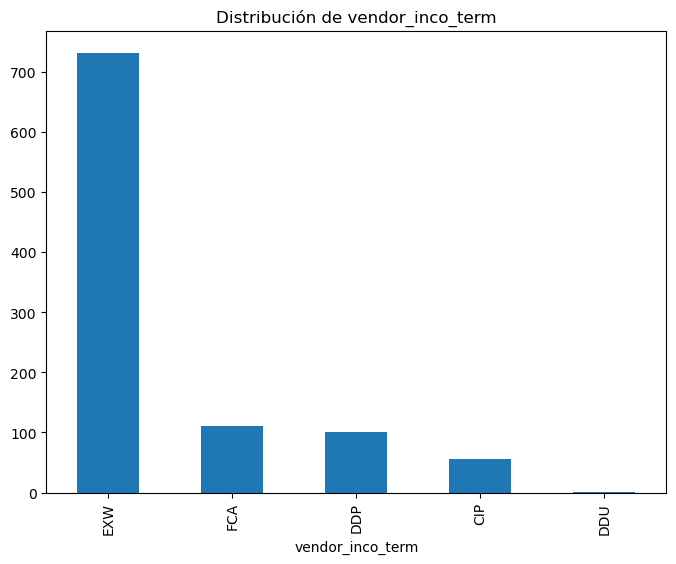

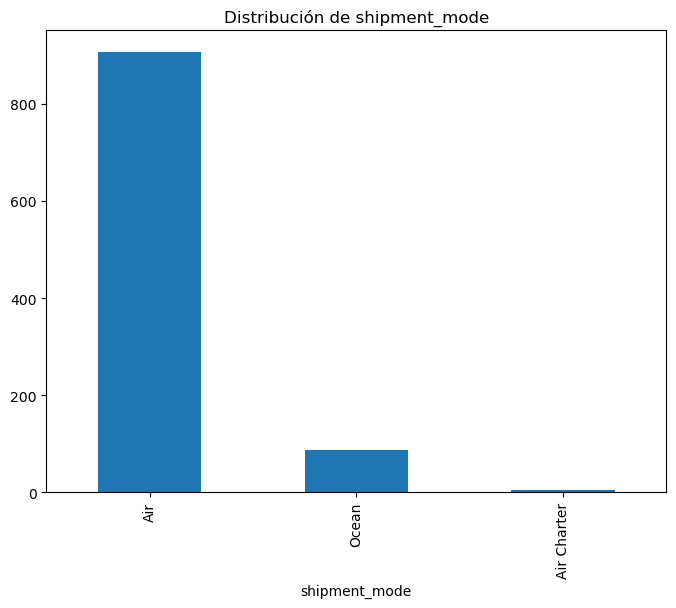

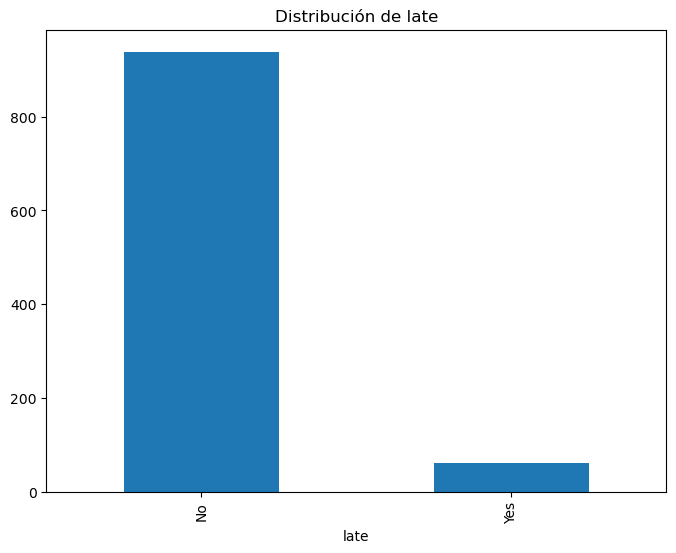

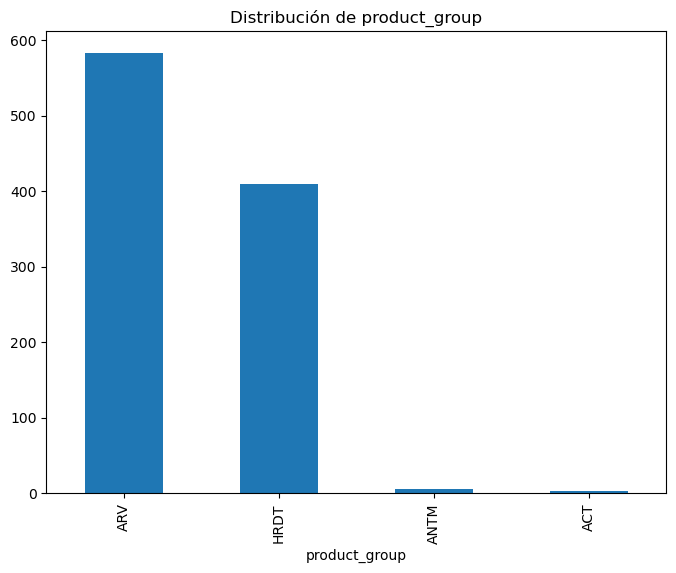

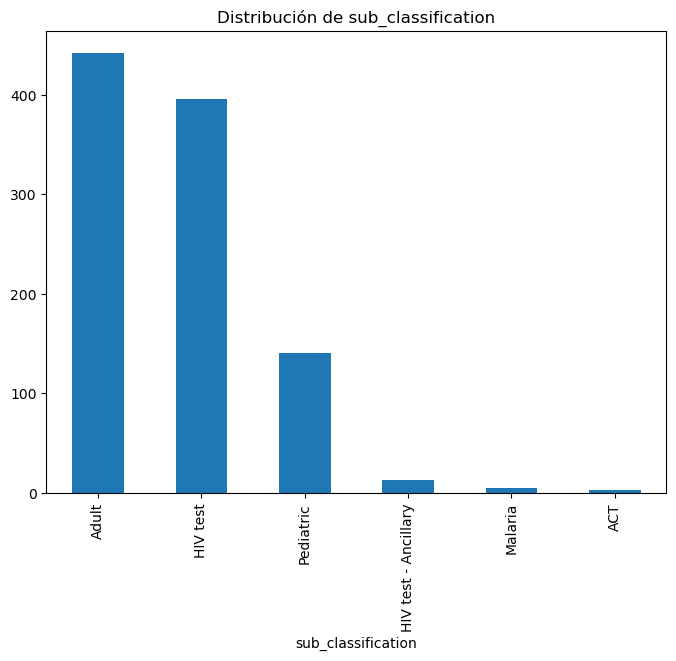

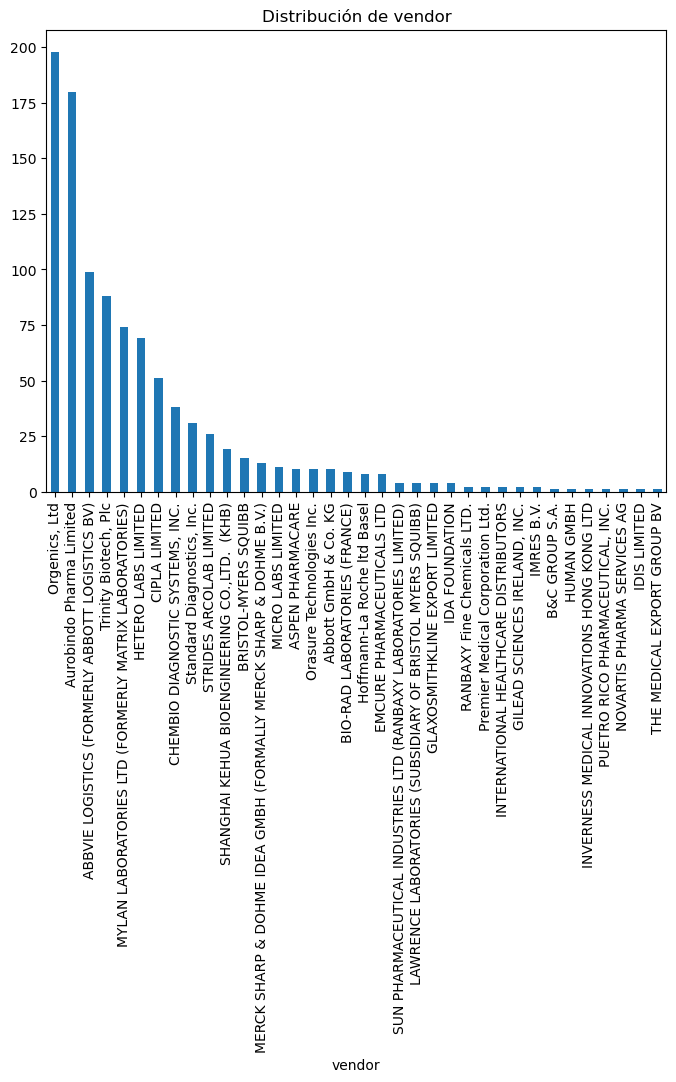

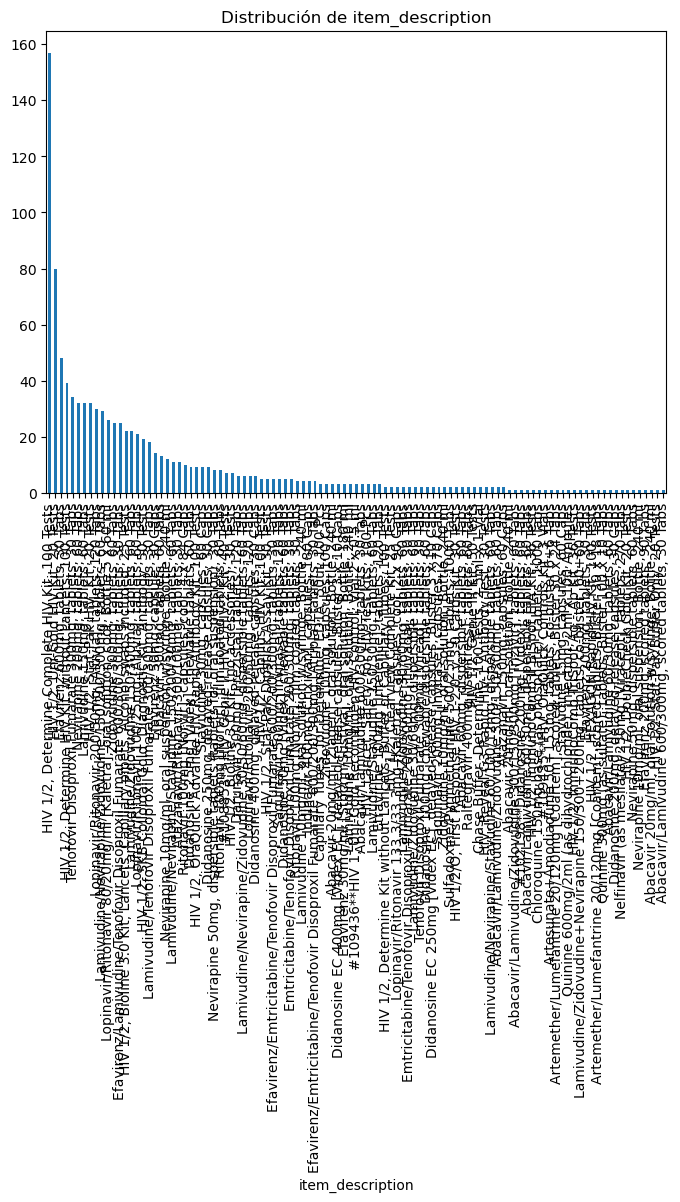

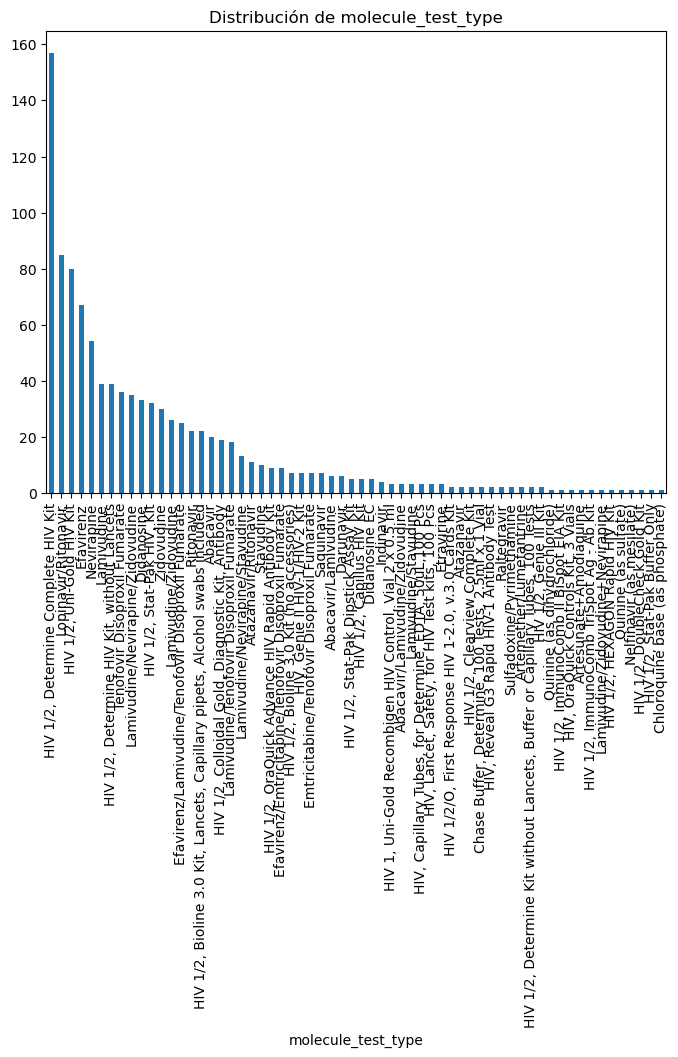

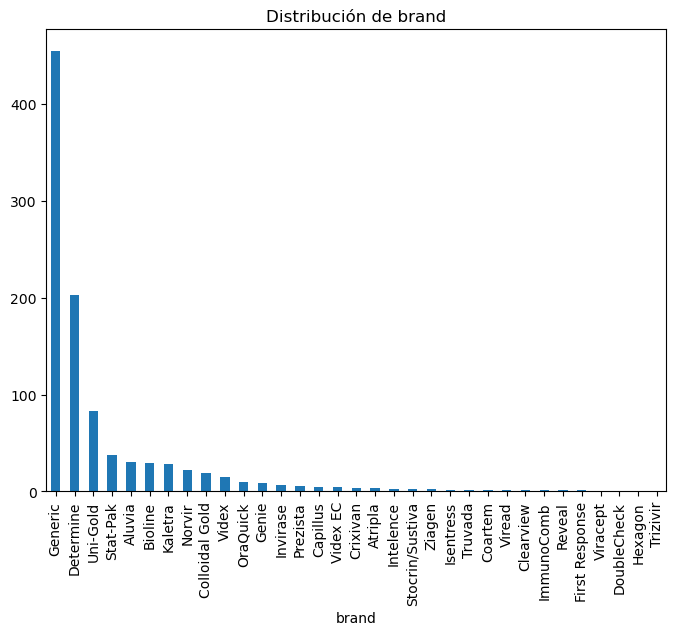

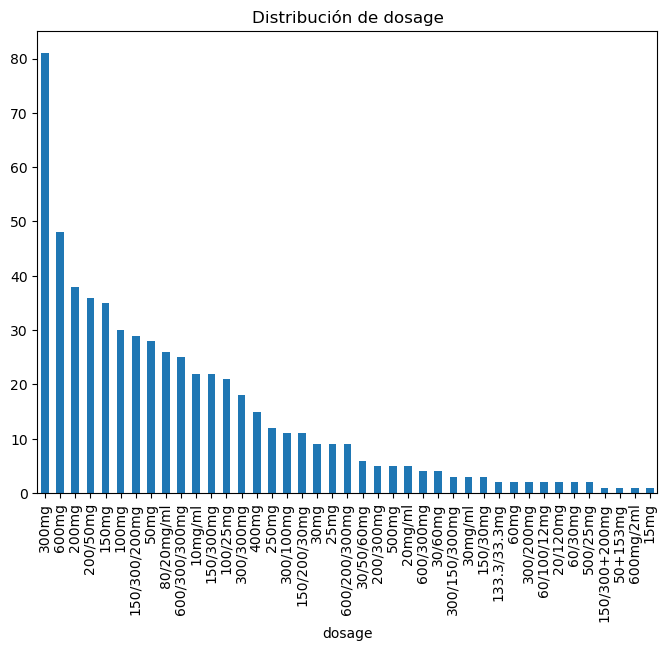

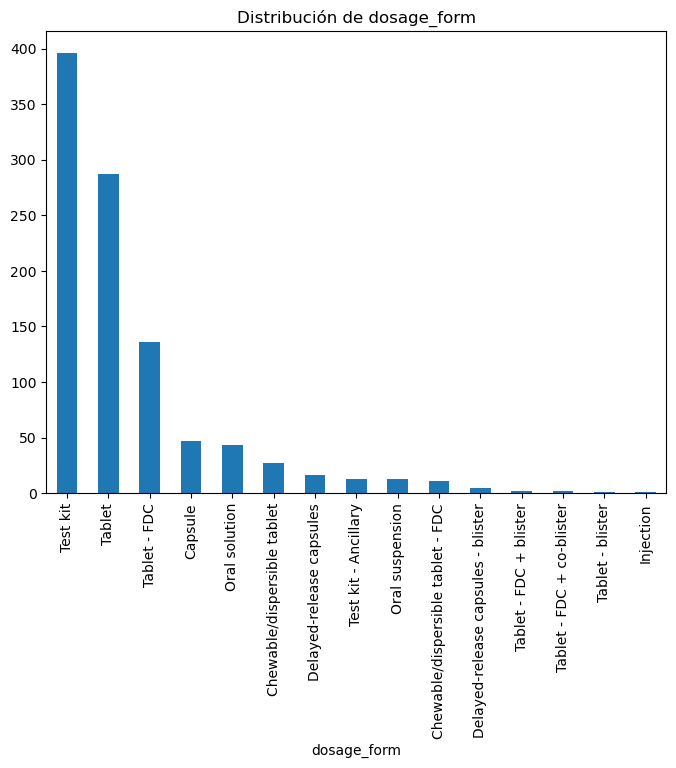

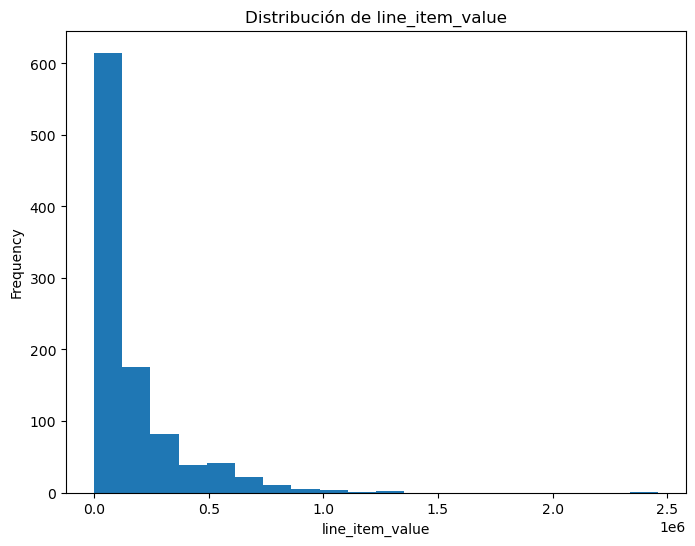

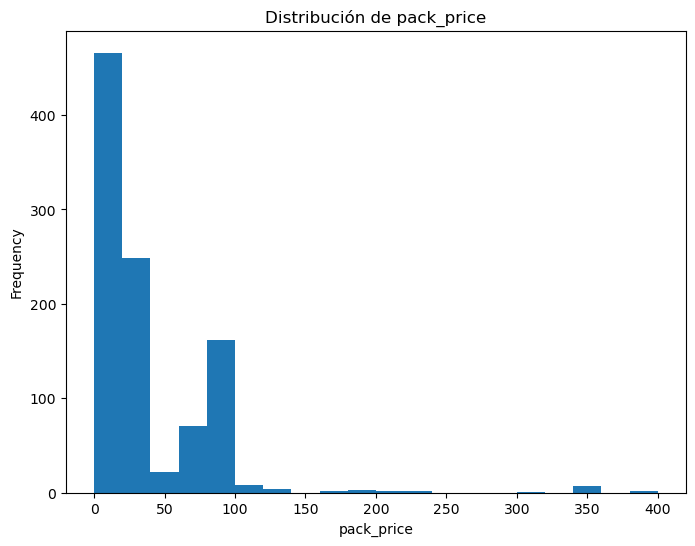

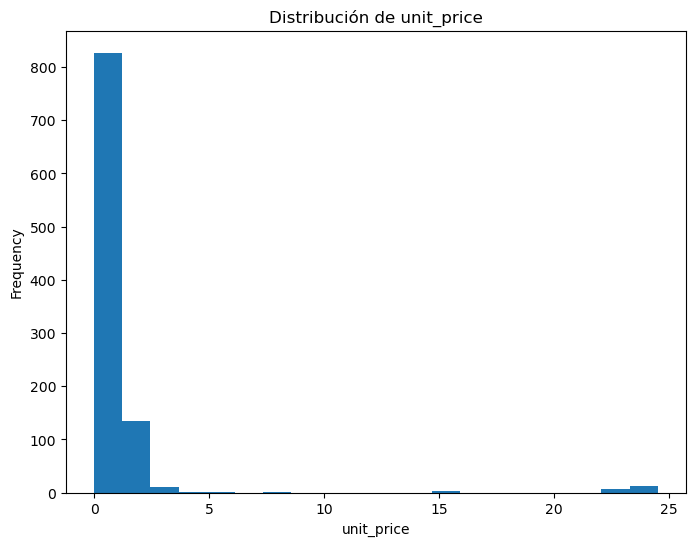

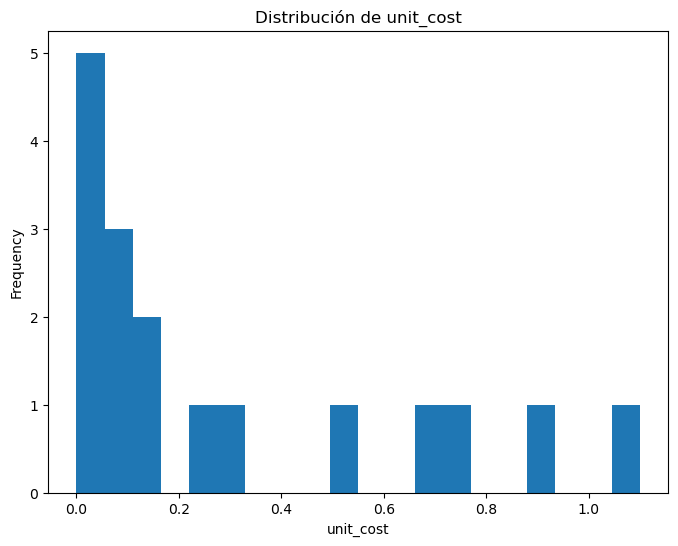

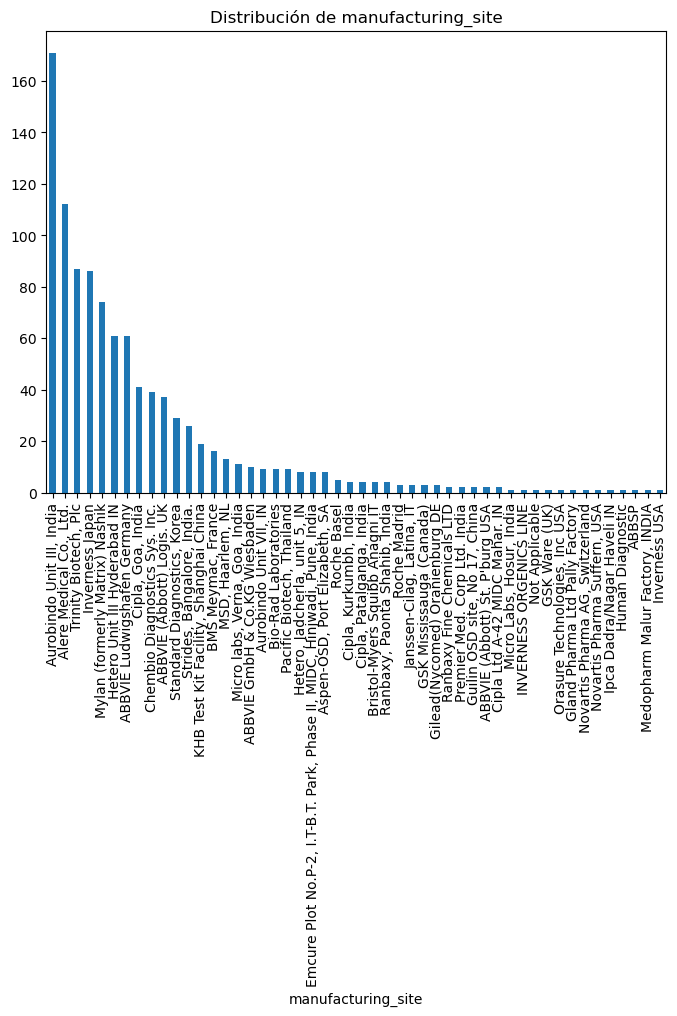

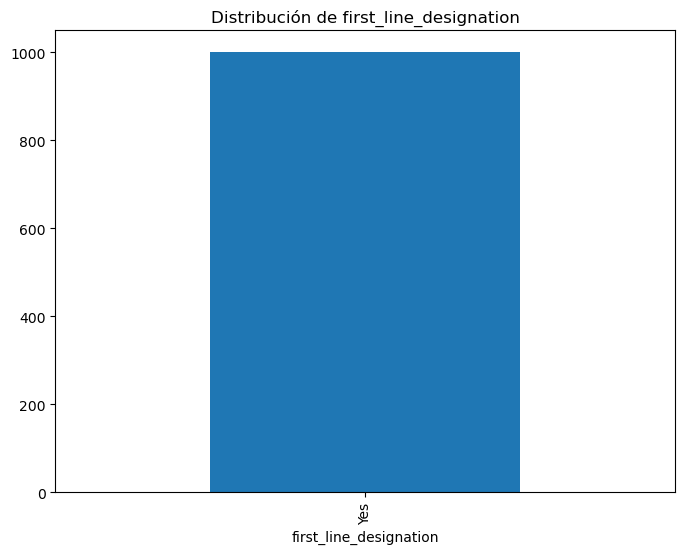

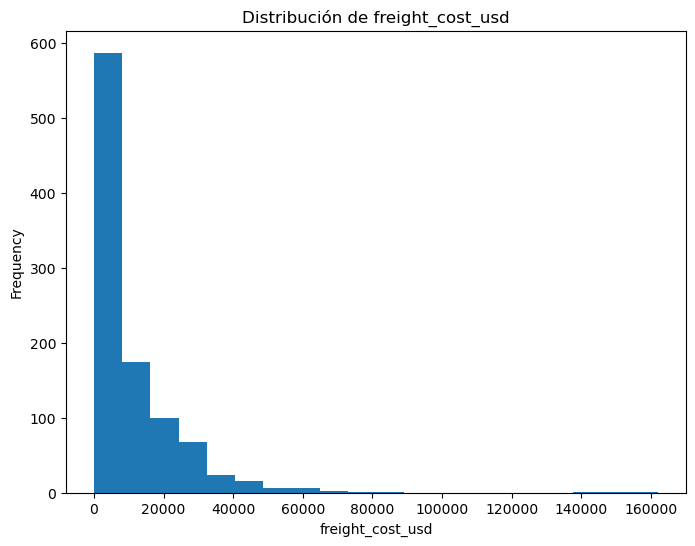

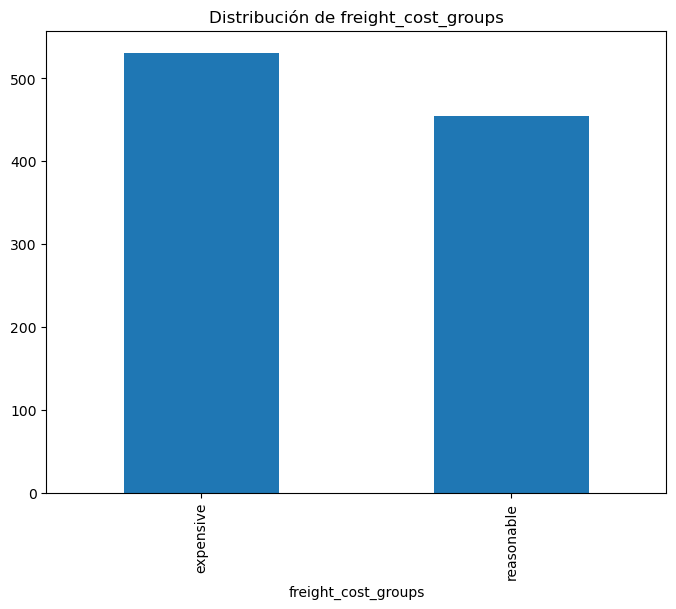

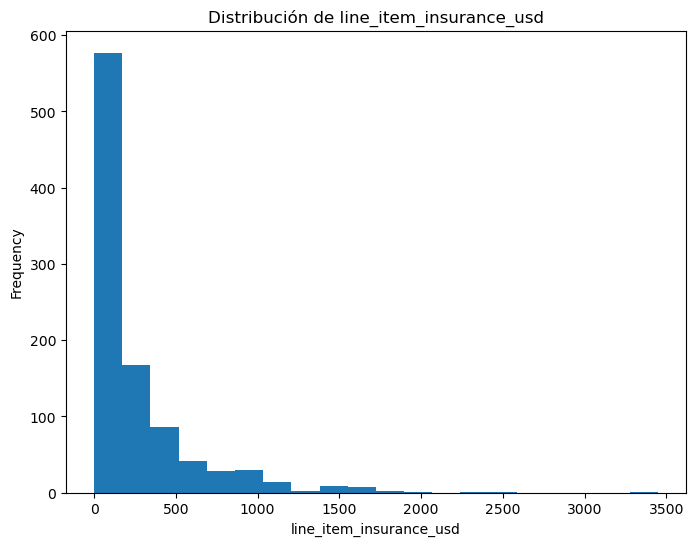

In [74]:
for column in df.columns:
    column_type = df[column].dtype

    if column_type in [int, float]:
        plt.figure(figsize=(8, 6))
        df[column].plot(kind='hist', bins=20)
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.show()
    
    elif column_type == object:
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.show()


In [48]:
#Tratando los datos

In [75]:
pd.options.display.max_rows = 0
datos_nulos = df.isnull().sum()
print(datos_nulos)

id                            0
country                       0
managed_by                    0
fulfill_via                   0
vendor_inco_term              0
shipment_mode                 0
late_delivery                 0
late                          0
product_group                 0
sub_classification            0
vendor                        0
item_description              0
molecule_test_type            0
brand                         0
dosage                      409
dosage_form                   0
unit_of_measure_per_pack      0
line_item_quantity            0
line_item_value               0
pack_price                    0
unit_price                    0
unit_cost                   983
manufacturing_site            0
first_line_designation        0
weight_kilograms              0
freight_cost_usd             14
freight_cost_groups          14
line_item_insurance_usd      34
dtype: int64


In [76]:
limite = len(df) * 0.05
print(limite)

50.0


In [77]:
limite = 50
nulos_columna = df.isnull().sum()
exceso = nulos_columna[nulos_columna > limite]
print("Columnas con exceso de nulos:")
print(exceso)

Columnas con exceso de nulos:
dosage       409
unit_cost    983
dtype: int64


In [78]:
moda_dosage = df['dosage'].mode()[0]
df['dosage'].fillna(moda_dosage, inplace=True)
median_unit_cost = df['unit_cost'].median()
df['unit_cost'].fillna(median_unit_cost, inplace=True)

In [84]:
colum_eliminar = df.columns[df.isna().sum() <= limite].copy()
print(colum_eliminar)

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'unit_cost', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')


In [85]:
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Conteo de datos nulos, ordenados de forma descendente:")
print(null_counts)

Conteo de datos nulos, ordenados de forma descendente:
line_item_insurance_usd     34
freight_cost_groups         14
freight_cost_usd            14
country                      0
weight_kilograms             0
first_line_designation       0
manufacturing_site           0
unit_cost                    0
unit_price                   0
pack_price                   0
line_item_value              0
line_item_quantity           0
unit_of_measure_per_pack     0
dosage_form                  0
id                           0
brand                        0
molecule_test_type           0
item_description             0
vendor                       0
sub_classification           0
product_group                0
late                         0
late_delivery                0
shipment_mode                0
vendor_inco_term             0
fulfill_via                  0
managed_by                   0
dosage                       0
dtype: int64


In [86]:
pd.options.display.max_rows = 0
df_limpio = df.dropna(subset=colum_eliminar).copy()
print(df_limpio.isna().sum().sort_values(ascending=False))

id                          0
country                     0
freight_cost_groups         0
freight_cost_usd            0
weight_kilograms            0
first_line_designation      0
manufacturing_site          0
unit_cost                   0
unit_price                  0
pack_price                  0
line_item_value             0
line_item_quantity          0
unit_of_measure_per_pack    0
dosage_form                 0
dosage                      0
brand                       0
molecule_test_type          0
item_description            0
vendor                      0
sub_classification          0
product_group               0
late                        0
late_delivery               0
shipment_mode               0
vendor_inco_term            0
fulfill_via                 0
managed_by                  0
line_item_insurance_usd     0
dtype: int64


In [87]:
df_limpio['shipment_mode'].replace({'categoría_1': 'categoria_1'}, inplace=True)

In [88]:
df_limpio['country'] = df_limpio['country'].astype('category')
df_limpio['fulfill_via'] = df_limpio['fulfill_via'].astype('category')
df_limpio['vendor_inco_term'] = df_limpio['vendor_inco_term'].astype('category')
df_limpio['shipment_mode'] = df_limpio['shipment_mode'].astype('category')
df_limpio['molecule_test_type'] = df_limpio['molecule_test_type'].astype('category')

In [89]:
df_numeric = df_limpio.select_dtypes(include=[int, float])
cv_results = (df_numeric.std() / df_numeric.mean()) * 100
cv_results = cv_results.sort_values(ascending=False)
print("Columnas con mayor dispersión (coeficiente de variación):")
print(cv_results)

Columnas con mayor dispersión (coeficiente de variación):
late_delivery               397.125925
unit_price                  309.661380
line_item_quantity          235.605291
weight_kilograms            150.611319
line_item_insurance_usd     145.775161
line_item_value             138.945131
freight_cost_usd            131.160462
pack_price                  126.626686
unit_of_measure_per_pack    118.386822
id                           59.969722
unit_cost                    41.802512
dtype: float64


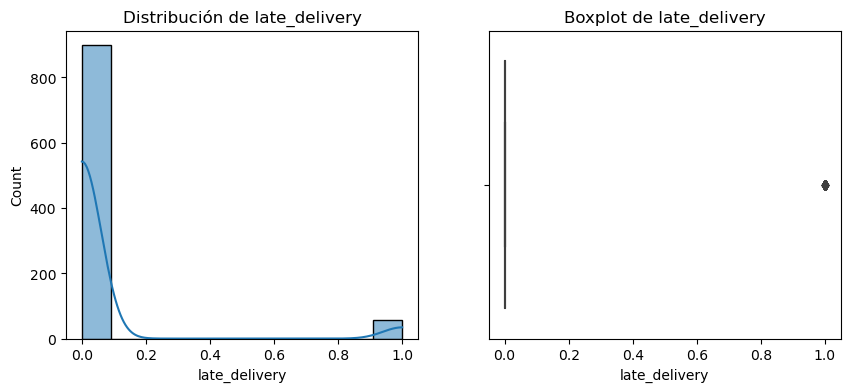

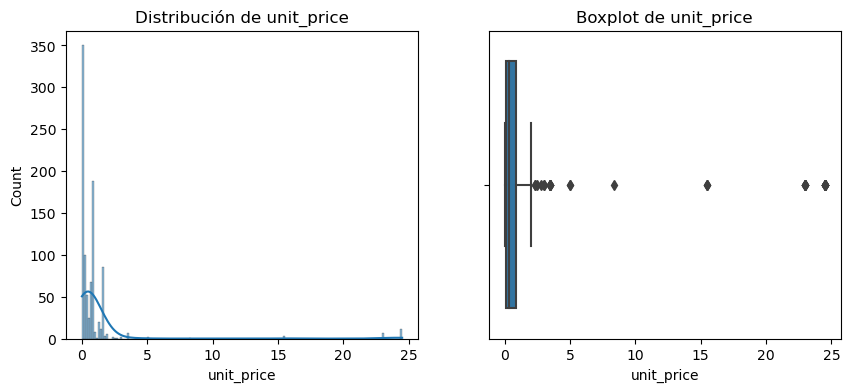

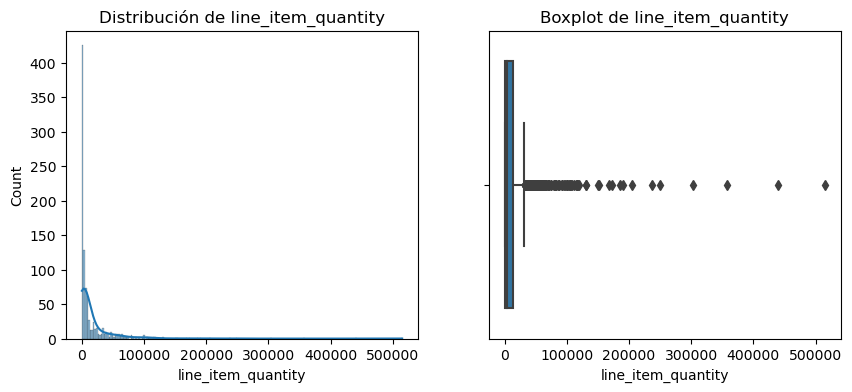

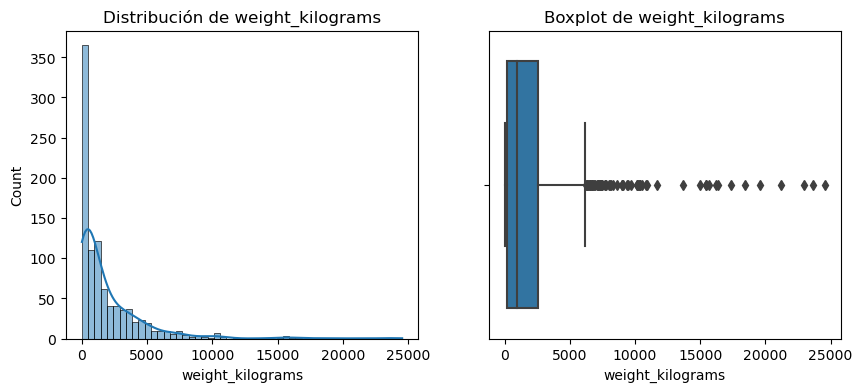

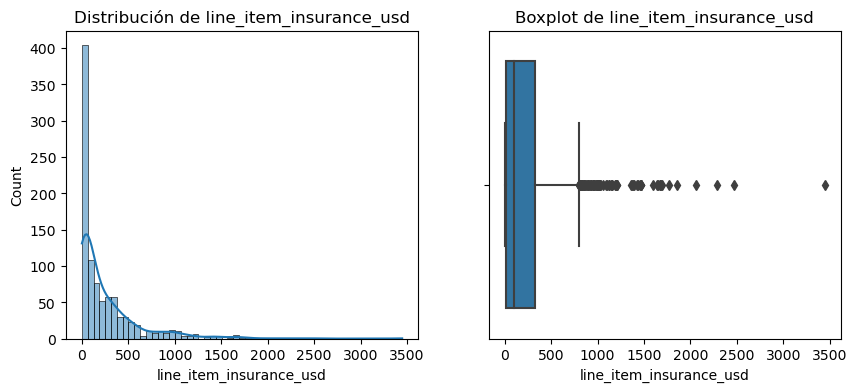

In [90]:
n_columnas_mayor_dispersión = 5
columnas_mayor_dispersión = cv_results.head(n_columnas_mayor_dispersión).index

for columna in columnas_mayor_dispersión:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_numeric[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_numeric, x=columna)
    plt.title(f'Boxplot de {columna}')
    plt.show()


In [ ]:
#Preguntas
#¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "line_item_insurance_usd"?
#Si, con los datos numericos actuales es posible realizar predicciones para la columna line_item_insurance_usd, esta variable se puede predecir en funcion de las otras variables numericas en el conjunto de datos.

#¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "late_delivery"?
#Sí, con los datos numéricos actuales es posible realizar predicciones para la columna late_delivery.
#Para realizar prediciones sobre esta variable, se puede utilizar un modelo de clasificacion.
#¿Cree que alguna otra columna (objeto o categórica) se pueda correlacionar fuertemente con "late_delivery"?, si es así, ¿cuál o cuáles cree que tendrían una correlación fuerte?
#Es posble, pero se necesita verificar cual es la que tiene mayor relacion.

In [163]:
corr_df = df_limpio.corr(numeric_only=True)
correlation_with_target_df = corr_df['line_item_insurance_usd'].sort_values(ascending=False)

corr_numeric = df_numeric.corr()
correlation_with_target_numeric = corr_numeric['line_item_insurance_usd'].sort_values(ascending=False)

print("Correlación con la variable 'line_item_insurance_usd' (DataFrame completo):\n\n")
print(correlation_with_target_df)

print("\nCorrelación con la variable 'line_item_insurance_usd' (Solo variables numéricas):\n\n")
print(correlation_with_target_numeric)


Correlación con la variable 'line_item_insurance_usd' (DataFrame completo):


line_item_insurance_usd     1.000000
line_item_value             0.961828
weight_kilograms            0.663397
line_item_quantity          0.624134
freight_cost_usd            0.472532
late_delivery               0.133720
id                          0.064190
pack_price                  0.015320
unit_cost                  -0.032310
unit_price                 -0.038883
unit_of_measure_per_pack   -0.078490
Name: line_item_insurance_usd, dtype: float64

Correlación con la variable 'line_item_insurance_usd' (Solo variables numéricas):


line_item_insurance_usd     1.000000
line_item_value             0.961828
weight_kilograms            0.663397
line_item_quantity          0.624134
freight_cost_usd            0.472532
late_delivery               0.133720
id                          0.064190
pack_price                  0.015320
unit_cost                  -0.032310
unit_price                 -0.038883
unit_of_measur

In [164]:
columnas_corr = ['line_item_insurance_usd','line_item_value', 'weight_kilograms', 'line_item_quantity']
df_var_corr = df_limpio[columnas_corr].copy()
df_var_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   line_item_insurance_usd  955 non-null    float64
 1   line_item_value          955 non-null    float64
 2   weight_kilograms         955 non-null    int64  
 3   line_item_quantity       955 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 37.3 KB


In [165]:
y = df_var_corr['line_item_insurance_usd']
x = df_var_corr.drop('line_item_insurance_usd', axis=1)

In [166]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=2033)

In [167]:
modelo = LinearRegression()
modelo.fit(x_entrenamiento,y_entrenamiento)
y_predicciones = modelo.predict(x_prueba)  

In [168]:
#Predicciones
mse = mean_squared_error(y_prueba, y_predicciones)
mae = mean_absolute_error(y_prueba, y_predicciones)
r2 = r2_score(y_prueba, y_predicciones)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 (Coefficient of Determination):", r2)

Mean Squared Error (MSE): 7685.963684652521
Mean Absolute Error (MAE): 50.58197916095212
R^2 (Coefficient of Determination): 0.9179487835522339


In [ ]:
###--------------------------

In [ ]:
#¿Su modelo fue capaz de realizar predicciones con precisión?
#Si,el modelo de regresión lineal que entrenaste fue capaz de realizar predicciones con bastante precisión.

In [ ]:
#¿A qué cree que se deba el rendimiento de su modelo?
#Debe ser que los datos estan limpios, no contienen errores o datos atípico o datos faltantes significativos. 

In [ ]:
#Si selecciona todas las variables y las asigna en X, en lugar de las que tienen correlación más fuerte, ¿cree que el modelo mejore o empeore?
#Si seleccionas todas las variables en lugar de solo las que tienen una correlación más fuerte con la variable objetivo, el resultado podría variar y dependerá de varios factores
#como por ejmplo el sobreajuste.

In [175]:
# Hipotesis nula (Ho)
# Ho: La proporción de entrega tarde ("late_delivery") es igual o menor al 6% (0.06).

In [ ]:
#Hipotesis alternativa
#H1: La proporción de entrega tarde ("late_delivery") es mayor que 0.06 (6%).
#Para probar la hipotesis se haria con una prueba de hipotesis de cola, para determinar si la proporcion de entregas tardias es mayor que 6%

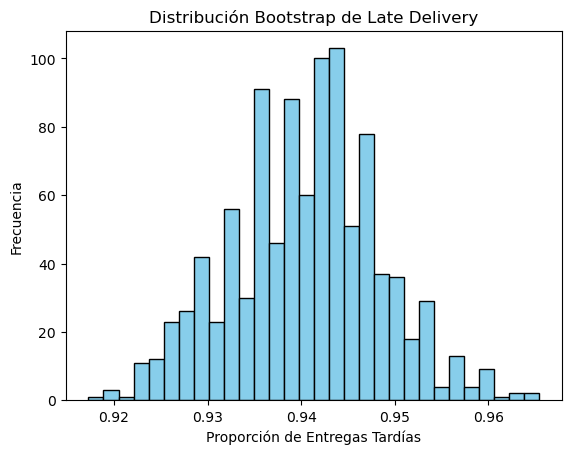

Error Estándar de la Distribución Bootstrap: 0.007968573384417433


In [176]:
late_delivery_data = df_limpio['late_delivery']
num_bootstrap_samples = 1000
sample_size = len(late_delivery_data)

bootstrap_errors = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(late_delivery_data, size=sample_size, replace=True)
    bootstrap_error = 1 - np.mean(bootstrap_sample) 
    bootstrap_errors.append(bootstrap_error)

bootstrap_standard_error = np.std(bootstrap_errors)

plt.hist(bootstrap_errors, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Proporción de Entregas Tardías')
plt.ylabel('Frecuencia')
plt.title('Distribución Bootstrap de Late Delivery')
plt.show()

print("Error Estándar de la Distribución Bootstrap:", bootstrap_standard_error)


In [186]:
media_poblacion = df_limpio['late_delivery'].mean()
z_score = (media_poblacion - Ho) / error_estandar_bootstrap
print('Estadístico Z:', z_score)

Estadístico Z: -0.042204057671115056


In [194]:
from scipy.stats import norm

z_score = -0.042204057671115056

alpha = 0.05

p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Valor p (p-value):", p_value)

if p_value <= alpha:
    print("Rechazamos la hipótesis nula (H0).")
else:
    print("No tenemos suficiente evidencia para rechazar la hipótesis nula (H0).")

Valor p (p-value): 0.9663360278904294
No tenemos suficiente evidencia para rechazar la hipótesis nula (H0).


In [199]:
bootstrap_distribution = [0.007968573384417433]
alpha = 0.05

lower_percentile = alpha / 2
upper_percentile = 1 - (alpha / 2)

lower_limit = np.percentile(bootstrap_distribution, lower_percentile * 100)
upper_limit = np.percentile(bootstrap_distribution, upper_percentile * 100)

confidence_interval = (lower_limit, upper_limit)

print("Intervalo de confianza al", (1-alpha)*100, "%:", confidence_interval)


Intervalo de confianza al 95.0 %: (0.007968573384417433, 0.007968573384417433)
